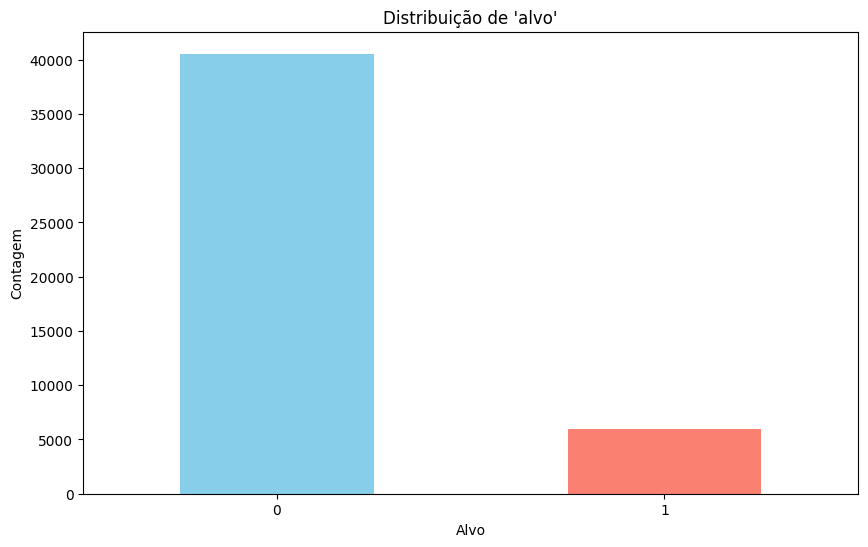

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("Dados Tratados.xlsx")

plt.figure(figsize=(10, 6))
    
# Plotando o gráfico de barras
cross_tab = data['alvo'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

plt.title("Distribuição de 'alvo'")
plt.xlabel("Alvo")
plt.ylabel("Contagem")
plt.xticks([0, 1], ['0', '1'], rotation=0)
    
plt.show()


alvo
0    40542
1    40542
Name: count, dtype: int64


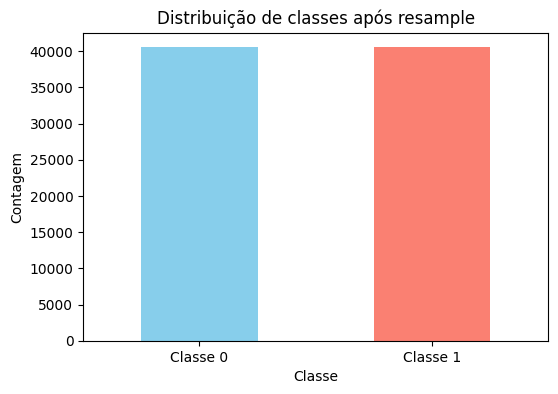

In [5]:
from sklearn.utils import resample

# Separar as classes minoritária e majoritária
classe_maior = data[data['alvo'] == 0]
classe_menor = data[data['alvo'] == 1]

# Fazer resample da classe minoritária com reposição para ter o mesmo número de amostras da classe majoritária
classe_menor_resampled = resample(classe_menor, 
                                  replace=True,     # Amostras são substituídas após cada resample
                                  n_samples=len(classe_maior),    # Número de amostras igual à classe majoritária
                                  random_state=42)  # Reprodutibilidade dos resultados

# Concatenar a classe majoritária com a classe minoritária resampleada
data_resampled = pd.concat([classe_maior, classe_menor_resampled])

# Verificar os novos tamanhos das classes
print(data_resampled['alvo'].value_counts())

# Plotar o gráfico de barras da distribuição do target após o resample
plt.figure(figsize=(6, 4))
data_resampled['alvo'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição de classes após resample')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Classe 0', 'Classe 1'], rotation=0)
plt.show()


Modelo: Random Forest
Matriz de Confusão:
[[12104    70]
 [   73 12079]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12174
           1       0.99      0.99      0.99     12152

    accuracy                           0.99     24326
   macro avg       0.99      0.99      0.99     24326
weighted avg       0.99      0.99      0.99     24326


Acurácia:
0.9941215160733372


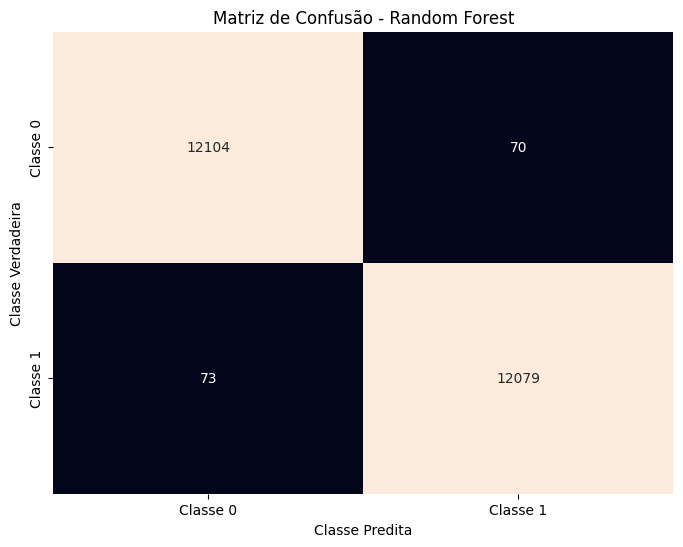


Modelo: Logistic Regression
Matriz de Confusão:
[[6751 5423]
 [5719 6433]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55     12174
           1       0.54      0.53      0.54     12152

    accuracy                           0.54     24326
   macro avg       0.54      0.54      0.54     24326
weighted avg       0.54      0.54      0.54     24326


Acurácia:
0.5419715530707885


c:\Users\facul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


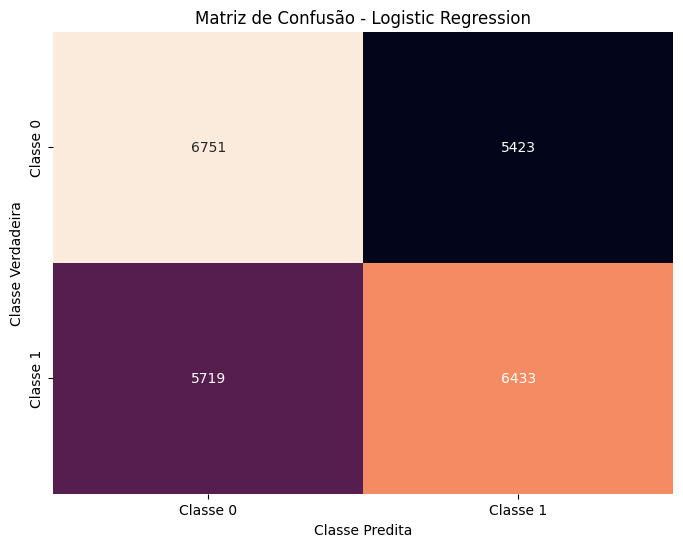


Modelo: K-Nearest Neighbors
Matriz de Confusão:
[[ 7364  4810]
 [  952 11200]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.60      0.72     12174
           1       0.70      0.92      0.80     12152

    accuracy                           0.76     24326
   macro avg       0.79      0.76      0.76     24326
weighted avg       0.79      0.76      0.76     24326


Acurácia:
0.7631340952067747


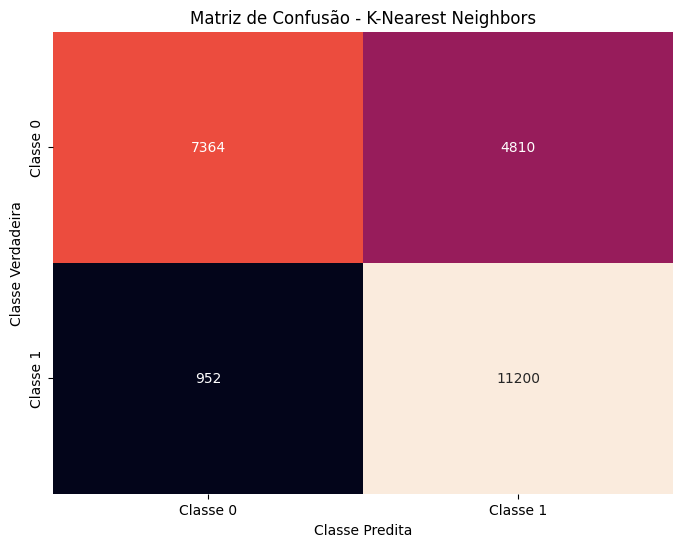

c:\Users\facul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Modelo: Support Vector Machine
Matriz de Confusão:
[[6736 5438]
 [6545 5607]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.51      0.55      0.53     12174
           1       0.51      0.46      0.48     12152

    accuracy                           0.51     24326
   macro avg       0.51      0.51      0.51     24326
weighted avg       0.51      0.51      0.51     24326


Acurácia:
0.5073994902573379


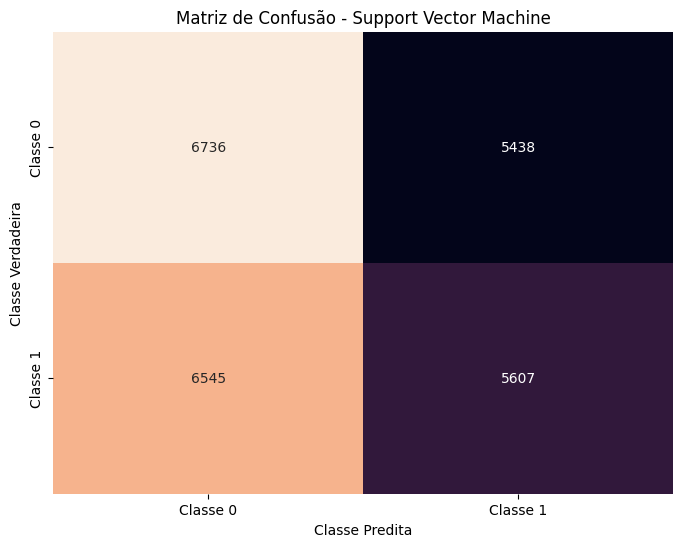


Modelo: Gradient Boosting
Matriz de Confusão:
[[7134 5040]
 [4763 7389]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.60      0.59      0.59     12174
           1       0.59      0.61      0.60     12152

    accuracy                           0.60     24326
   macro avg       0.60      0.60      0.60     24326
weighted avg       0.60      0.60      0.60     24326


Acurácia:
0.5970155389295404


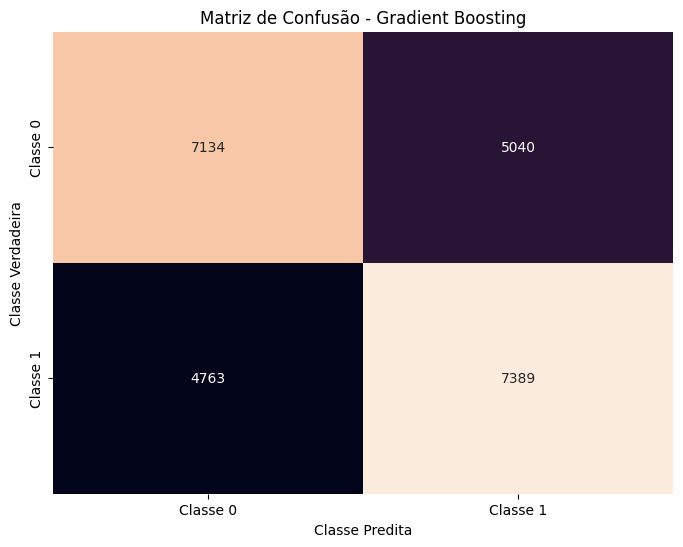

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar as features (X) e o alvo (y)
X = data_resampled.drop('alvo', axis=1)
y = data_resampled['alvo']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar os modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(kernel='linear', max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

import seaborn as sns

# Treinar e avaliar cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Avaliar o modelo
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\nModelo: {model_name}")
    print("Matriz de Confusão:")
    print(conf_matrix)
    
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    
    print("\nAcurácia:")
    print(accuracy_score(y_test, y_pred))
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
                xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Verdadeira')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()


Matriz de Confusão:
[[6714 5460]
 [4872 7280]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.58      0.55      0.57     12174
           1       0.57      0.60      0.58     12152

    accuracy                           0.58     24326
   macro avg       0.58      0.58      0.58     24326
weighted avg       0.58      0.58      0.58     24326


Acurácia:
0.5752692592288087


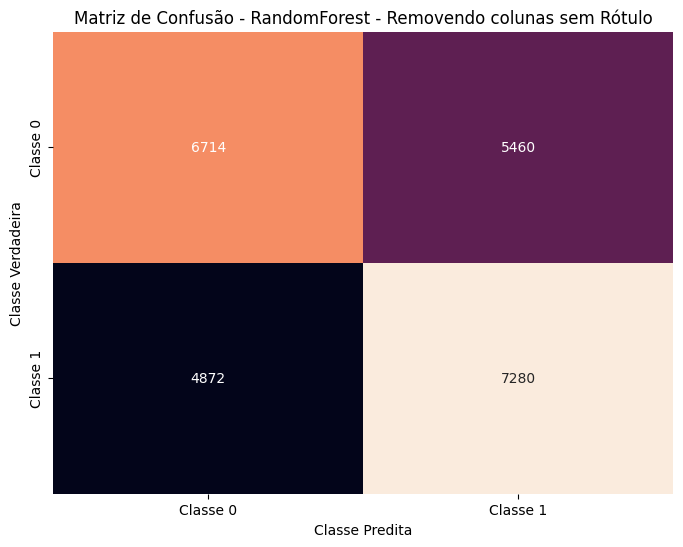

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar as features (X) e o alvo (y)
X = data_resampled[['DIAS_ATRASO', 'col_4', 'col_200', 'REGIAO', 'dia', 'mes']]
y = data_resampled['alvo']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar os modelos
models = RandomForestClassifier(n_estimators=100, random_state=42)

import seaborn as sns

# Treinar e avaliar cada modelo
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
# Avaliar o modelo
conf_matrix = confusion_matrix(y_test, y_pred)
    
print("Matriz de Confusão:")
print(conf_matrix)
    
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
    
print("\nAcurácia:")
print(accuracy_score(y_test, y_pred))
    
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
    xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title(f'Matriz de Confusão - RandomForest - Removendo colunas sem Rótulo')
plt.show()
